In [1]:
import pickle
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_som.som import SOM
import numpy as np

# Andiamo a caricare le serie temporali degli indici vigitali

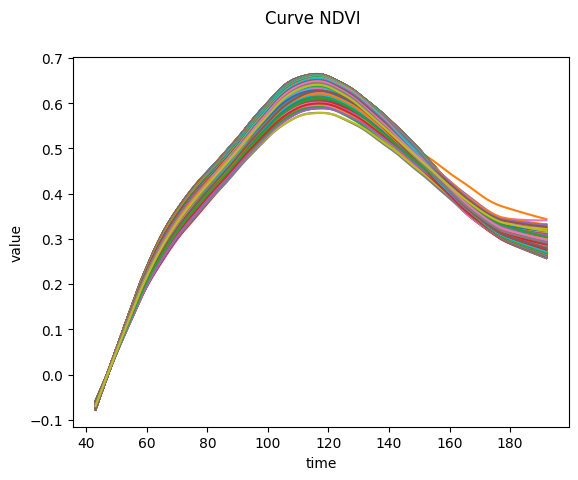

In [2]:
with open('./pickles/ndvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
NDVI.plot()
print() #fix duplicate plot

# Esempio di clustering

In [3]:
X = random_walks(n_ts=5000, sz=32, d=1)

print(NDVI.data_matrix.shape)

(1579, 150, 1)


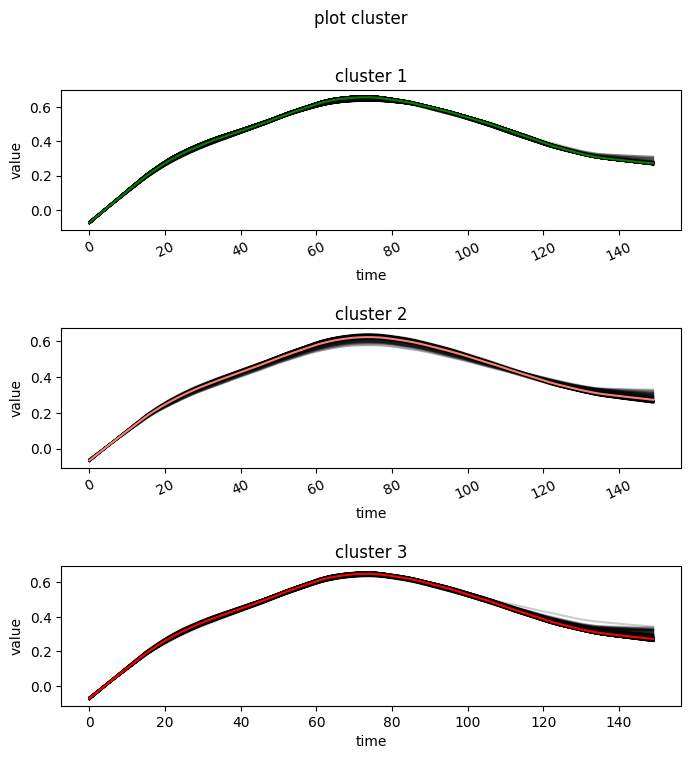

In [4]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0)
y_pred = km.fit_predict(NDVI.data_matrix)

#img = plt.figure()

'''for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in NDVI.data_matrix[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, NDVI.data_matrix.shape[1])
    plt.ylim(0, 0.7)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")'''

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.7)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for xx in NDVI.data_matrix[y_pred == 0]:
        axs[0].plot(xx.ravel(), "k-", alpha=.2)

axs[0].plot(range(0,150),km.cluster_centers_[0].ravel(),color="green")
axs[0].set_title("cluster 1")
axs[0].set_xlabel("time")
axs[0].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 1]:
        axs[1].plot(xx.ravel(), "k-", alpha=.2)

axs[1].plot(range(0,150),km.cluster_centers_[1],color="salmon")
axs[1].set_title("cluster 2")
axs[1].set_xlabel("time")
axs[1].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 2]:
        axs[2].plot(xx.ravel(), "k-", alpha=.2)

axs[2].plot(range(0,150),km.cluster_centers_[2],color="red")
axs[2].set_title("cluster 3")
axs[2].set_xlabel("time")
axs[2].set_ylabel("value")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

In [5]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)
print(allPixelNDVIPoly.shape) #fix duplicate plot

(1579, 150)


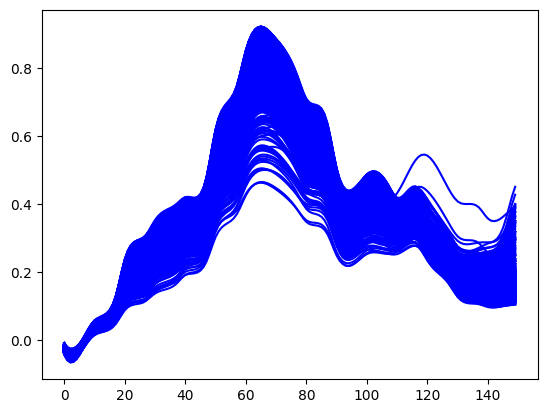

In [6]:
for a in range(0,allPixelNDVIPoly.shape[0]):
    plt.plot(range(0,150),allPixelNDVIPoly[a,:],color='blue')

plt.show()

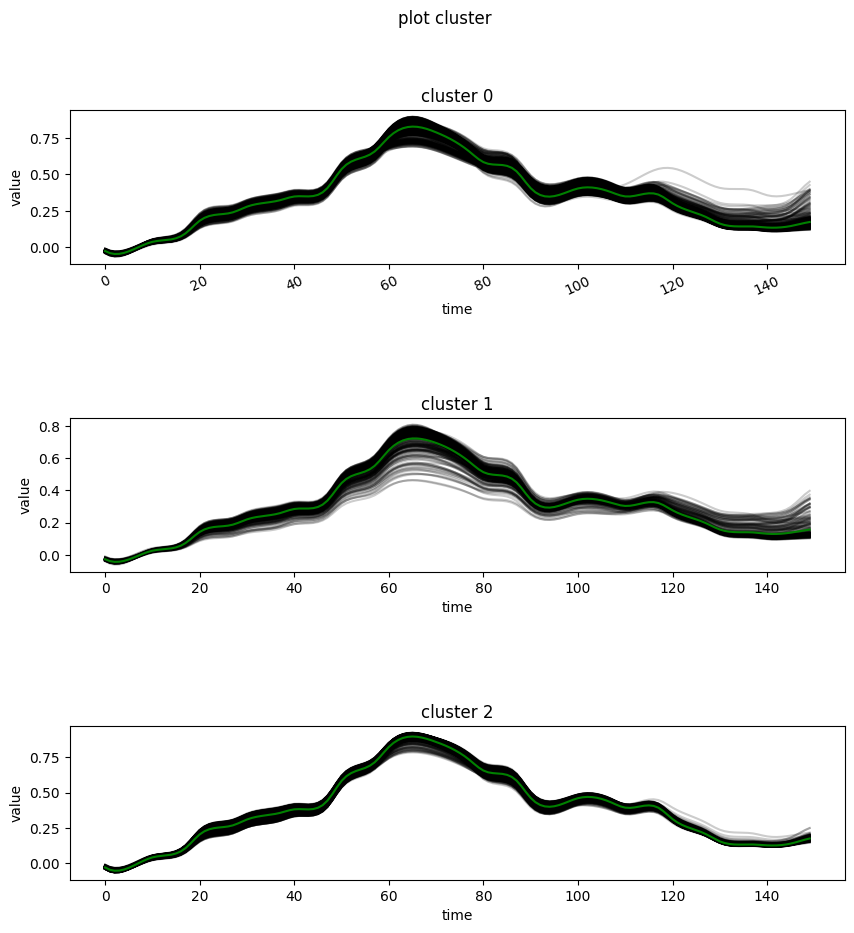

In [7]:
num_cluster = 3

km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=5,
                      random_state=0)
y_pred = km.fit_predict(allPixelNDVIPoly)

fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly[y_pred == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("value")
    plt.sca(axs[b])


#plt.sca(axs[1])
#plt.xticks(rotation=25)
plt.show()

# Cerchiamo il numero K migliore per la nostra operazione di clustering

In [8]:
distortions = []

for i in range(1,11):
    km = TimeSeriesKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(allPixelNDVIPoly)
    distortions.append(km.inertia_)

# Stampo il grafico

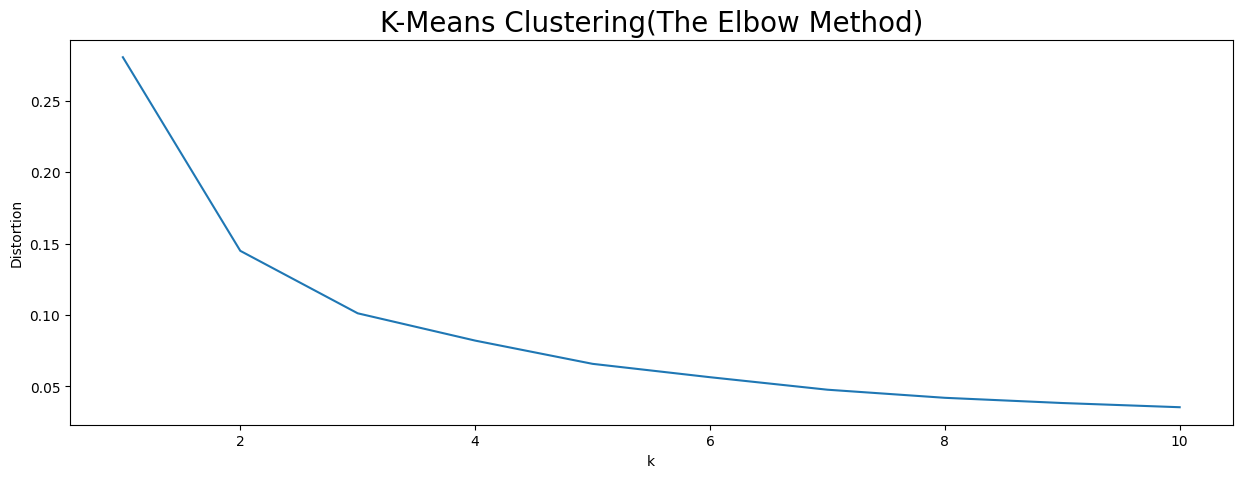

In [9]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [10]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)
print(newResa3.shape) #fix duplicate plot

(1579,)


In [11]:
rese_c1 = newResa3[y_pred == 0]
rese_c2 = newResa3[y_pred == 1]
rese_c3 = newResa3[y_pred == 2]
series_c1 = allPixelNDVIPoly[y_pred == 0]
print(rese_c1.shape)
print(series_c1.shape)

(723,)
(723, 150)


# Stampiamo box plot dei cluster

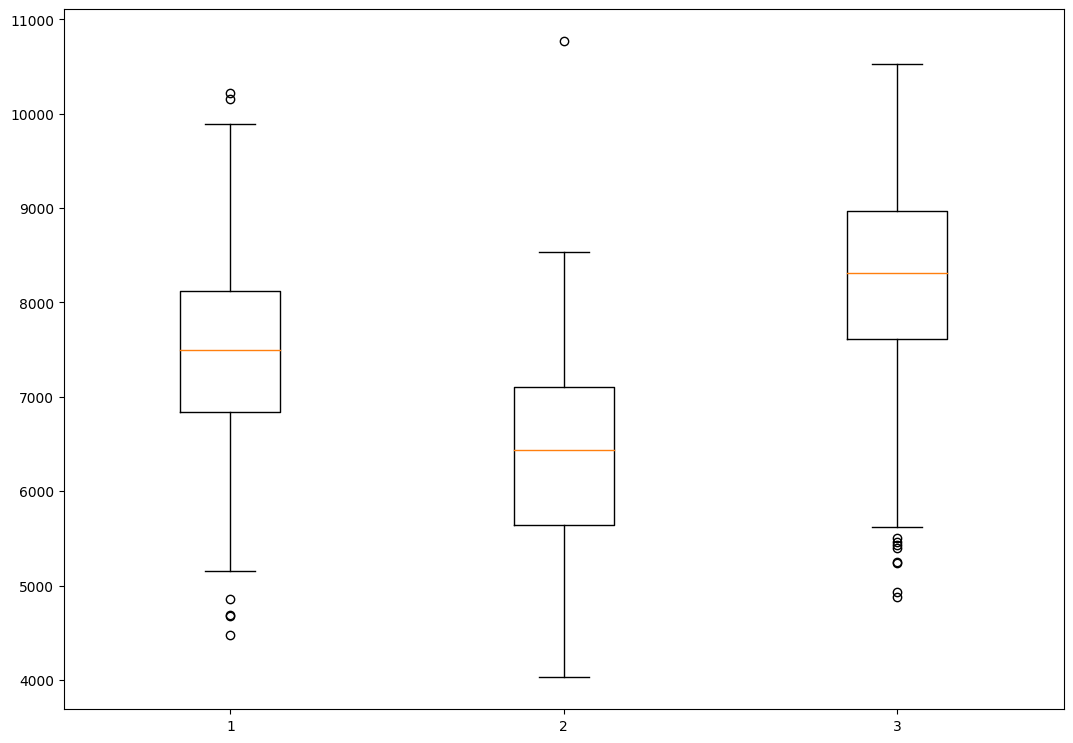

In [12]:

# Creating dataset
np.random.seed(10)

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([rese_c1[(rese_c1<=11000) & (rese_c1 >= 4000)],rese_c2[(rese_c2<=11000) & (rese_c2 >= 4000)],rese_c3[(rese_c3<=11000) & (rese_c3 >= 4000)]])

# show plot
plt.show()


# Utilizziamo il dbscan per cercare di estrarre i cluster

In [13]:

db = DBSCAN(eps=0.1, min_samples=6).fit(NDVI.data_matrix[:,:,0])
labels = db.labels_


In [14]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 4


(1579,)


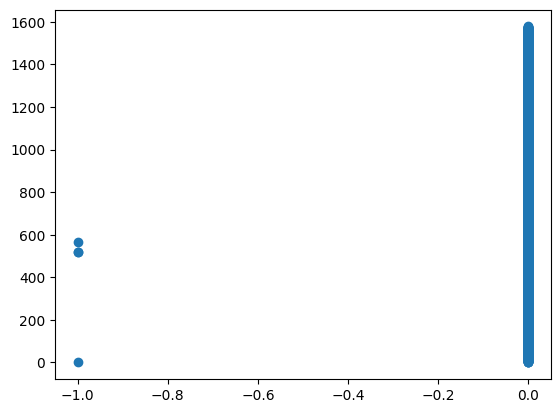

In [15]:
print(labels.shape)
plt.scatter(labels,range(0,1579))

# Utilizziamo l'algoritmo SOM

In [16]:
with open('./pickles/AllPixelBand3.pickle', 'rb') as handle:
    bande3 = pickle.load(handle)
print(bande3.shape) #fix duplicate plot

(1579, 12, 150)
